## Dependecies:
- numpy, pandas, matplotlib, seaborn, sklearn, keras, pydot
# Read in training and testing data and do some housekeeping:
1. Remove duplicate rows
2. Split both datasets into an n-dim feature/design matrix and 1-dim target/predictor vector
3. Manually encode a value to the binary categorical labels of the target/predictor vector

In [1]:
import numpy as np
import pandas as pd


# Read in the data, note: 'education-num' is a proxy for level education
dataTypes = {'age':np.uint8,'workclass':'category', 'fnlwgt':np.uint32, 'education':'category', 'education-num':np.uint8,
             'marital-status':'category', 'occupation':'category', 'relationship':'category', 'race':'category', 'sex':'category', 
             'capital-gain':np.uint32, 'capital-loss':np.uint32, 'hours-per-week':np.uint8, 'native-country':'category',
             'class':'category'}


# Note, we have a mixture of categorical and numerical data,
df_train = pd.read_csv('trainingData/au_train.csv', dtype=dataTypes, skipinitialspace=True, engine='c')
df_test = pd.read_csv('testingData/au_test.csv', dtype=dataTypes, skipinitialspace=True ,engine='c')


# Shuffle training set
# df_train = df_train.sample(frac=1)#random_state,weights


# Check for duplicate rows
# print(df_train.drop(columns=['class']).drop_duplicates(inplace=True))
# print(df_test.drop(columns=['class']).drop_duplicates(inplace=True))


# Check to see that samples do not have both a non-zero 'capital-gain' and 'capital-loss'
# checkGain = np.where(df_train['capital-gain'].to_numpy()>0,1,0)
# checkLoss = np.where(df_train['capital-loss'].to_numpy()>0,1,0)
# maxOfSumGainLoss = max(checkGain+checkLoss)
# print(maxOfSumGainLoss)


# Check some information and for bad values
# print('\nCheck some prelimiary info and for missing values/NaN:')
# print(df_train.info(),df_test.info())
# print(df_train.describe(),df_test.describe())


# Check for unlabeled categorical features in our DataFrames / misspellings
# print(sorted(list(df_train['workclass'].unique())))
# print(sorted(list(df_train['occupation'].unique())))
# print(sorted(list(df_train['native-country'].unique())))
# print(sorted(list(df_train['education'].unique())))
# print(sorted(list(df_test['workclass'].unique())))
# print(sorted(list(df_test['occupation'].unique())))
# print(sorted(list(df_test['native-country'].unique())))



# Check for misspelled labels
# categories = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
categories = [catFeat for catFeat in df_train.select_dtypes(include="category")]
for cat in categories:
    a = set(df_train[cat].unique())
    b = set(df_test[cat].unique())
    if len(a.difference(b)):
        print('\nProblem while checking for missing/bad labels:')
        print('Categories in `%s` column of df_train not in df_test:'%cat,a.difference(b))
        print('Categories in `%s` column of df_test not in df_train:'%cat,b.difference(a))

# Note: The test sets target has an extraneous '.' at the end. Handle this manually later
# In addition there is no entry for 'Holand-Netherlands' in the test set so you could argue that data 
# to train on may not be needed
# print('\n\n# of entries before dropping Holand-Netherlands:',len(df_train))
# df_train = df_train.replace('Holand-Netherlands',-1)
# print(df_train.query('`native-country`==-1',engine='python'))
# df_train = df_train.replace('Holand-Netherlands',np.nan).dropna()
# print('# of entries after dropping Holand-Netherlands:',len(df_train))



# Have some unlabeled/missing values (i.e '?') of categorical features in: 
#                'workclass','occupation','native-country'
# in both our training and testing DataFrame (categorical), need to drop those
print('\n\n# of rows in df_train before dropping unlabeled/missing values:',len(df_train))
df_train = df_train.replace('?',np.nan).dropna()
print('# of rows in df_train after dropping unlabeled/missing values:',len(df_train))
print('\n\n# of rows in df_test before dropping unlabeled/missing values:',len(df_test))
df_test = df_test.replace('?',np.nan).dropna()
print('# of rows in df_test after dropping unlabeled/missing values:',len(df_test))


# Manually encode the target
df_train['class'] = df_train['class'].replace(to_replace='>50K',value=1).replace(to_replace='<=50K',value=0)
df_test['class'] = df_test['class'].replace(to_replace='>50K.',value=1).replace(to_replace='<=50K.',value=0)


Problem while checking for missing/bad labels:
Categories in `native-country` column of df_train not in df_test: {'Holand-Netherlands'}
Categories in `native-country` column of df_test not in df_train: set()

Problem while checking for missing/bad labels:
Categories in `class` column of df_train not in df_test: {'>50K', '<=50K'}
Categories in `class` column of df_test not in df_train: {'<=50K.', '>50K.'}


# of rows in df_train before dropping unlabeled/missing values: 32561
# of rows in df_train after dropping unlabeled/missing values: 30162


# of rows in df_test before dropping unlabeled/missing values: 16281
# of rows in df_test after dropping unlabeled/missing values: 15060


# Note: There is more data for people making  <=50K, The target distribution in both training and testing data is the same but imbalanced

## Poke around the data to see if any of the features are skewed or may need scaling
## Visualization of categorical data

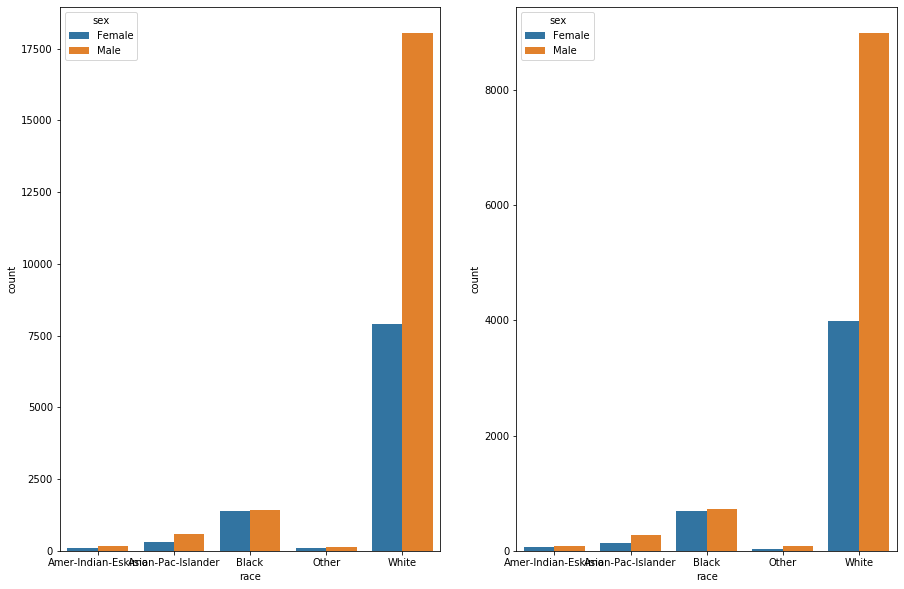

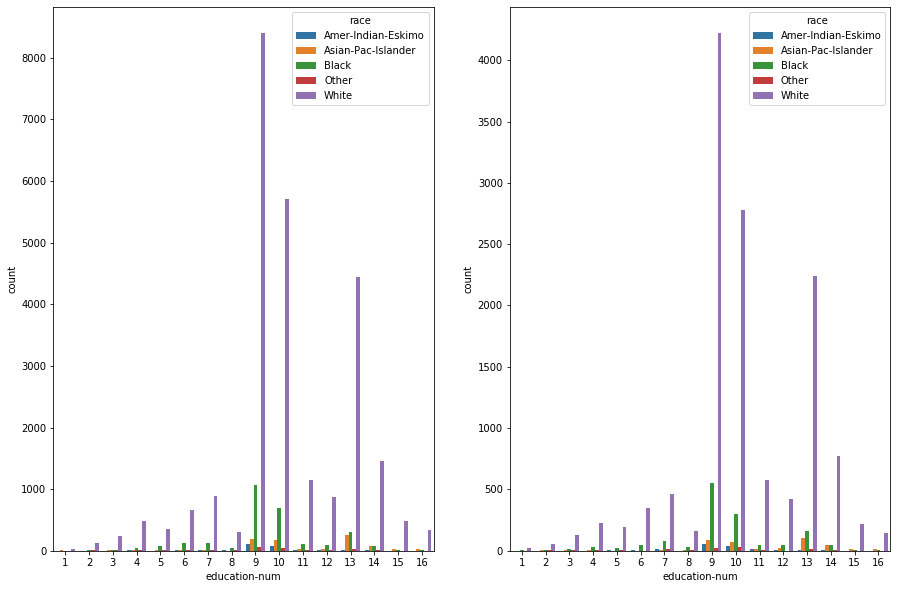

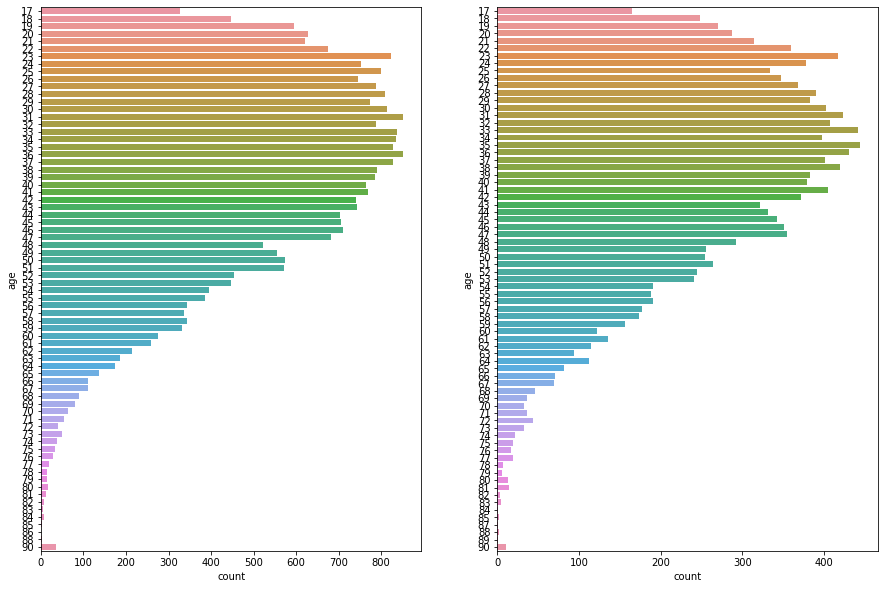

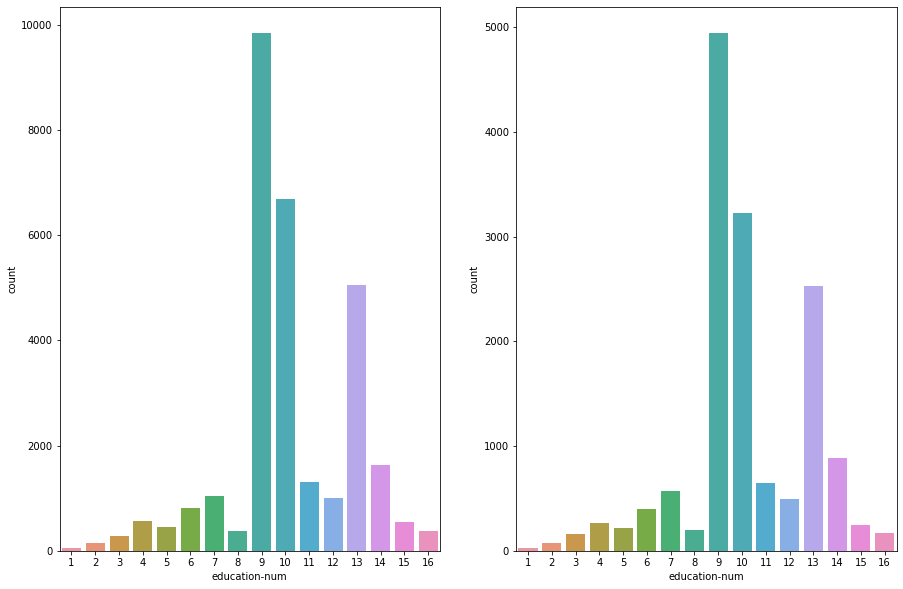

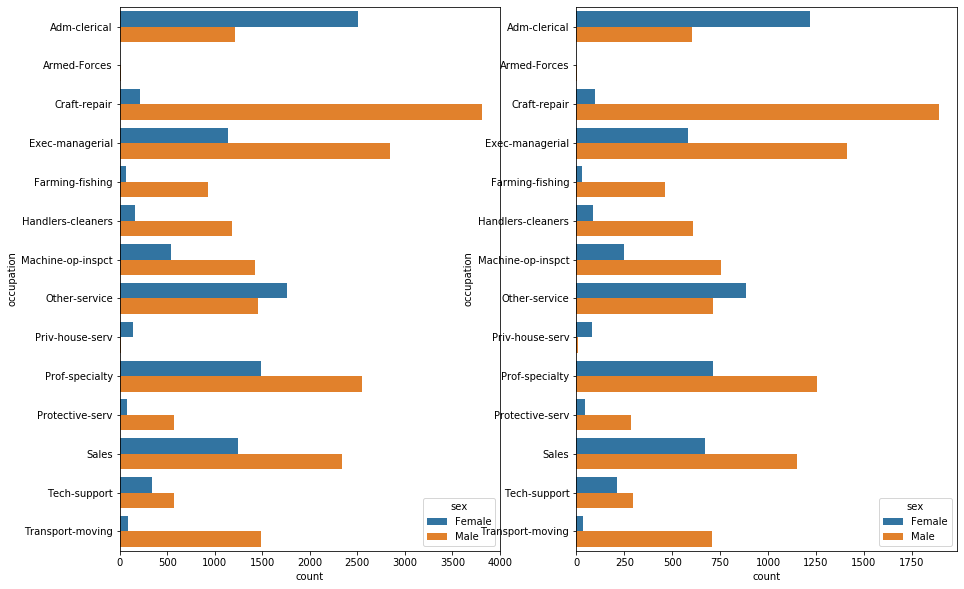

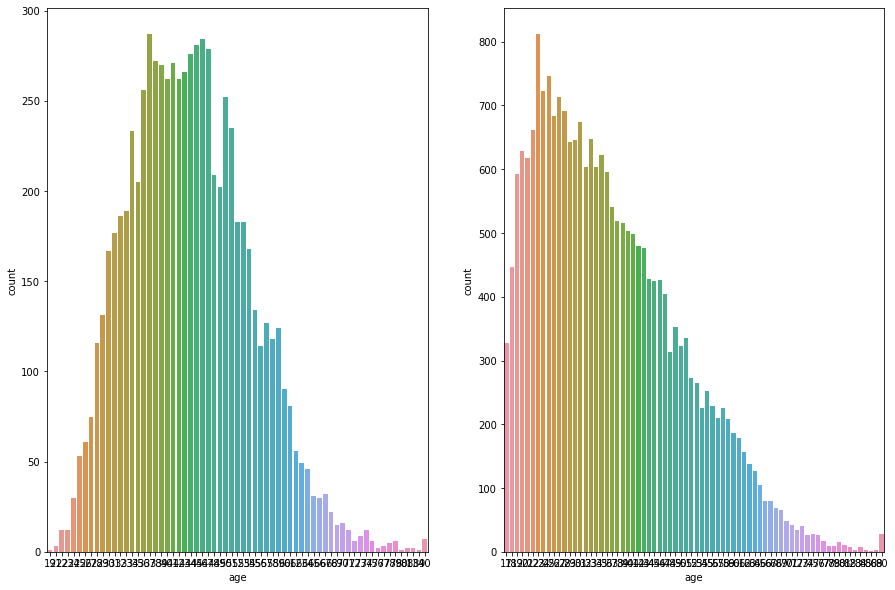

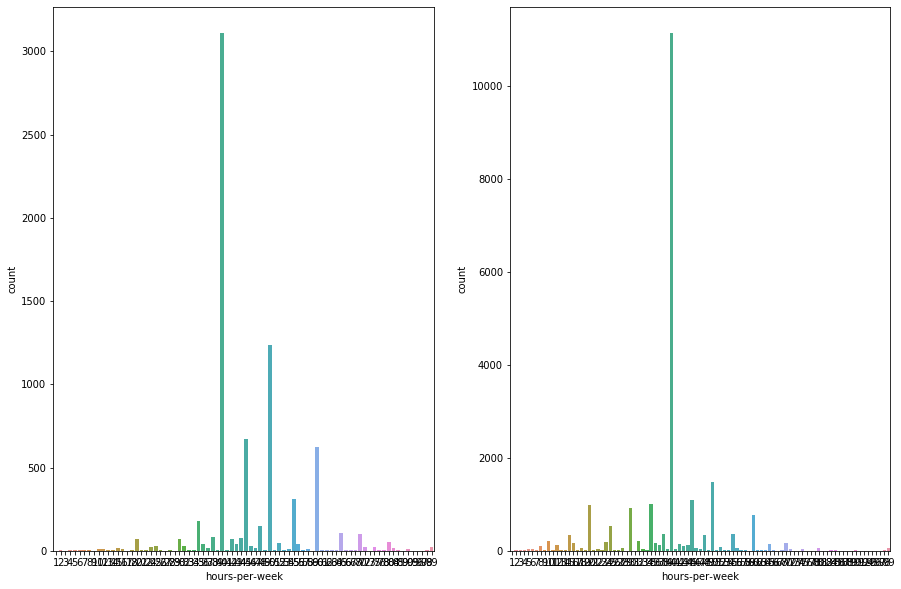

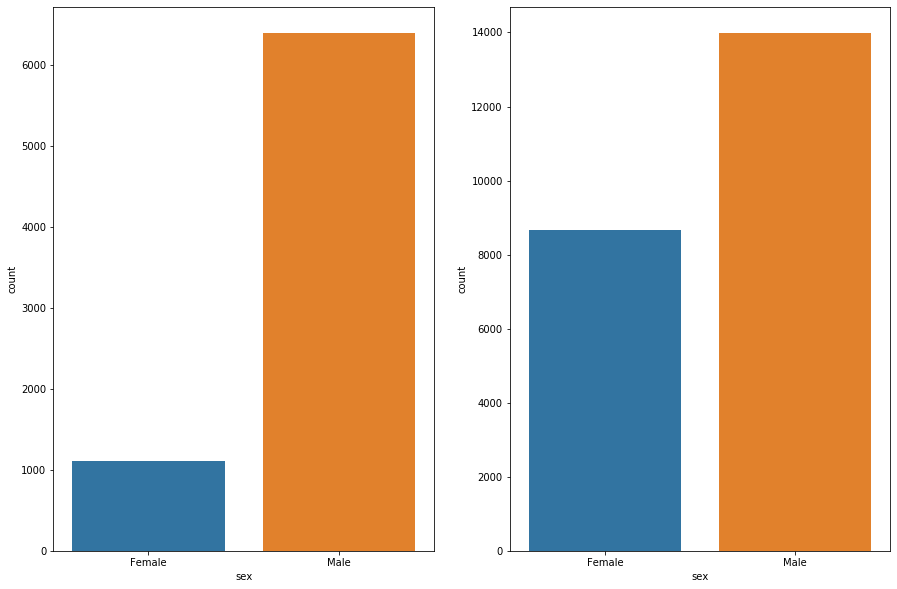

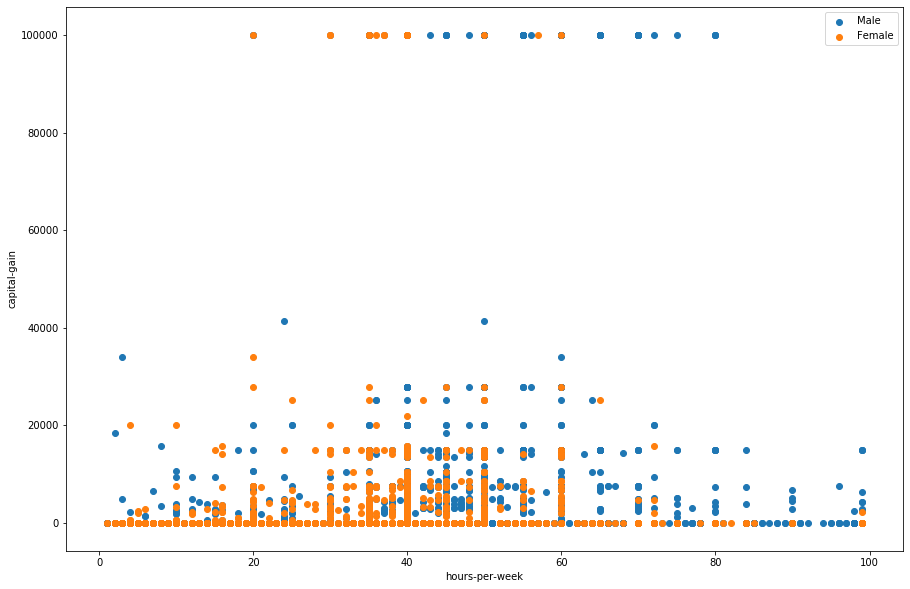

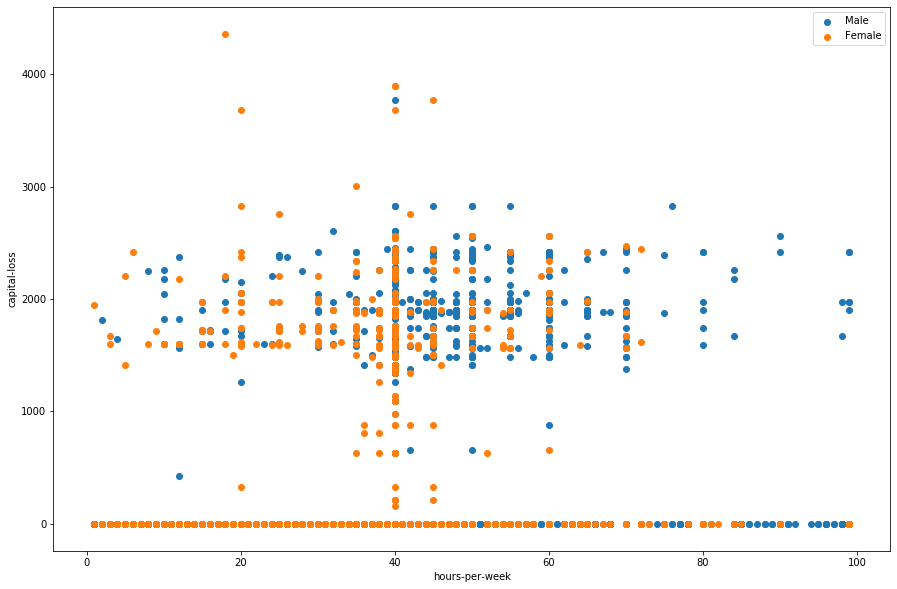

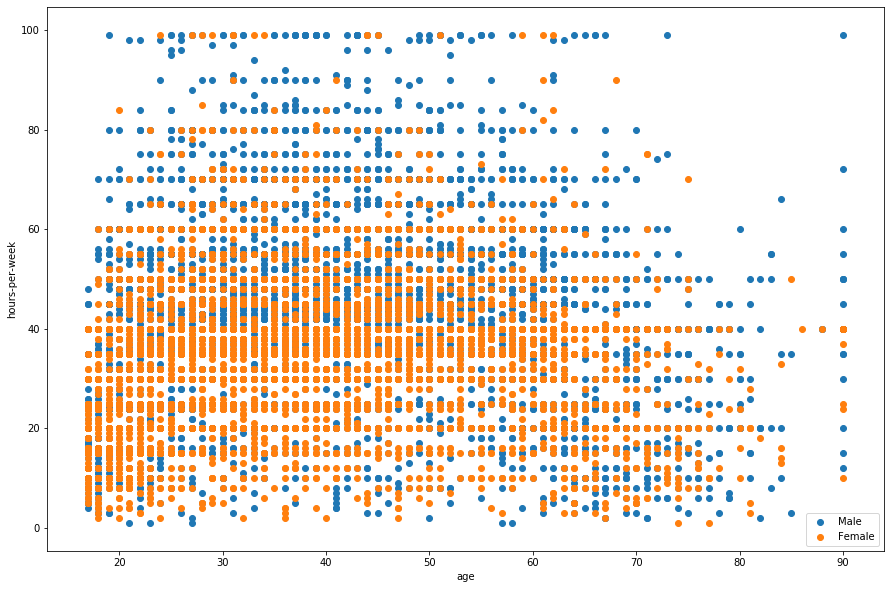

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Left plots belong to train and Right plots belong to test
# # Plot sample distribution of race for training and test set
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='race', hue='sex',ax=axes[0],data=df_train)
sns.countplot(x='race', hue='sex',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num', hue='race',ax=axes[0],data=df_train)
sns.countplot(x='education-num', hue='race',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='age',ax=axes[0],data=df_train)
sns.countplot(y='age',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num',ax=axes[0],data=df_train)
sns.countplot(x='education-num',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='occupation', hue='sex',ax=axes[0],data=df_train)
sns.countplot(y='occupation', hue='sex',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='age',ax=axes[0],data=df_train[df_train['class']==1],label='>50k')
sns.countplot(x='age',ax=axes[1],data=df_train[df_train['class']==0],label='<=50k')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='hours-per-week',ax=axes[0],data=df_train[df_train['class']==1],label='>50k')
sns.countplot(x='hours-per-week',ax=axes[1],data=df_train[df_train['class']==0],label='<=50k')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='sex',ax=axes[0],data=df_train[df_train['class']==1],label='>50k')
sns.countplot(x='sex',ax=axes[1],data=df_train[df_train['class']==0],label='<=50k')

# # Plot some of our features against each other
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.scatter(x='hours-per-week',y='capital-gain',data=df_train[df_train['sex']=='Male'],label='Male')
plt.scatter(x='hours-per-week',y='capital-gain',data=df_train[df_train['sex']=='Female'],label='Female')
plt.xlabel('hours-per-week')
plt.ylabel('capital-gain')
plt.legend()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.scatter(x='hours-per-week',y='capital-loss',data=df_train[df_train['sex']=='Male'],label='Male')
plt.scatter(x='hours-per-week',y='capital-loss',data=df_train[df_train['sex']=='Female'],label='Female')
plt.xlabel('hours-per-week')
plt.ylabel('capital-loss')
plt.legend()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.scatter(x='age',y='hours-per-week',data=df_train[df_train['sex']=='Male'],label='Male')
plt.scatter(x='age',y='hours-per-week',data=df_train[df_train['sex']=='Female'],label='Female')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.legend()



# Try some feature engineering

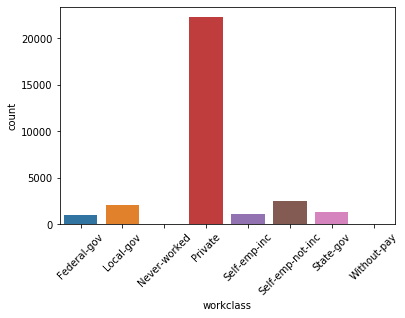

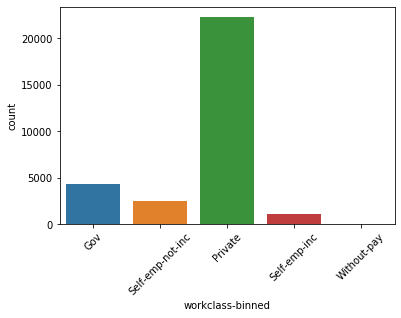

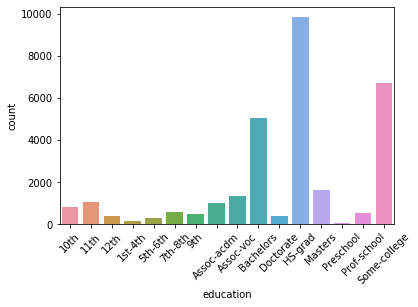

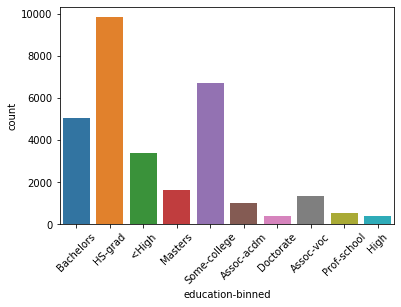

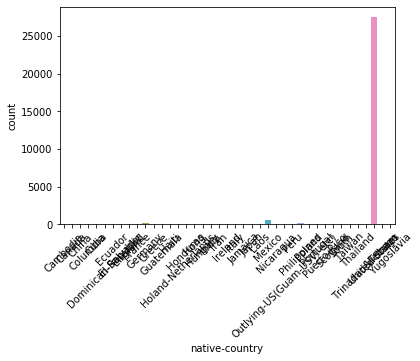

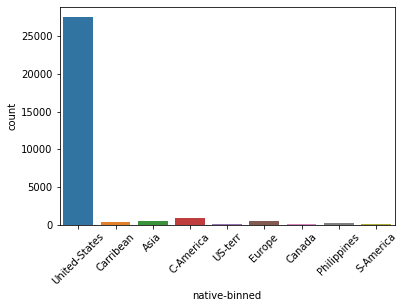

In [3]:
dictWorkclass = {'Federal-gov':'Gov','Local-gov':'Gov','State-gov':'Gov'}
df_train['workclass-binned'] = df_train['workclass'].replace(to_replace=dictWorkclass)
df_test['workclass-binned'] = df_train['workclass'].replace(to_replace=dictWorkclass)

# View effects on workclass distribution after rebinning
sns.countplot(x='workclass', data=df_train)
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='workclass-binned', data=df_train)
plt.xticks(rotation=45)
plt.show()



dictEducation = {'Preschool':'<High','1st-4th':'<High','5th-6th':'<High','7th-8th':'<High',
                 '9th':'<High','10th':'<High','11th':'<High','12th':'High'}
df_train['education-binned'] = df_train['education'].replace(to_replace=dictEducation)
df_test['education-binned'] = df_train['education'].replace(to_replace=dictEducation)

# View effects of rebinnning on  Education distribution
sns.countplot(x='education', data=df_train)
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='education-binned', data=df_train)
plt.xticks(rotation=45)
plt.show()



dictCountry = {'Cambodia':'Asia','Columbia':'S-America','Cuba':'Carribean','Dominican-Republic':'Carribean',
              'Ecuador':'C-America','El-Salvador':'C-America','England':'Europe','France':'Europe',
              'Germany':'Europe','Greece':'Europe','Guatemala':'C-America','Haiti':'Carribean','Holand-Netherlands':'Europe',
              'Honduras':'C-America','Hong':'Asia','Hungary':'Europe','India':'Asia','Iran':'Asia','Ireland':'Europe',
              'Italy':'Europe','Jamaica':'Carribean','Japan':'Asia','Laos':'Asia','China':'Asia','Mexico':'C-America',
              'Nicaragua':'C-America','Outlying-US(Guam-USVI-etc)':'US-terr','Puerto-Rico':'US-terr','Scotland':'Europe',
              'South':'Asia','Taiwan':'Asia','Thailand':'Asia','Trinadad&Tobago':'Carribean','Vietnam':'Asia','Yugoslavia':'Europe',
              'Philipines':'Asia','Poland':'Europe','Portugal':'Europe','Peru':'S-America'}
df_train['native-binned'] = df_train['native-country'].replace(to_replace=dictCountry)
df_test['native-binned'] = df_train['native-country'].replace(to_replace=dictCountry)

# View effects of rebinnning on  Education distribution
sns.countplot(x='native-country', data=df_train)
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='native-binned', data=df_train)
plt.xticks(rotation=45)
plt.show()



# Create new feature 'stonks' which is either 1 or 0. 1 if they had any capital-gain/loss, 0 if none. The assumption being
# If they are investing in stonks they have excess income
df_train['stonks'] = df_train['capital-gain']+df_train['capital-loss']
df_train['stonks'] = np.where(df_train['stonks']>0,1,0)
df_test['stonks'] = df_test['capital-gain']+df_test['capital-loss']
df_test['stonks'] = np.where(df_test['stonks']>0,1,0)

# Drop some features (some are redundant or have been rebinned)
df_train = df_train.drop(columns=['workclass','education','education-num','native-country','capital-gain','capital-loss','relationship','fnlwgt'])
df_test = df_test.drop(columns=['workclass','education','education-num','native-country','capital-gain','capital-loss','relationship','fnlwgt'])

df_train = df_train.astype({'workclass-binned':'category', 'education-binned':'category','native-binned':'category','stonks':np.uint8})
df_test = df_test.astype({'workclass-binned':'category', 'education-binned':'category','native-binned':'category','stonks':np.uint8})

# The data is still heterogeneous(mixed numerical and categorical data), *scikit-learn* requires explicit conversion of categorical features to numeric values (**preprocessing**).
1. Possibility to scale the numeric features (helpful sometimes i.e convergence)
2. Categorical data will be *OneHotEncoded* to guarantee model sensitivity only to the original category labels

In [4]:
# Split our data into 'X' commonly referred to as the 'Design Matrix' which contains our 
# 'predictors/features' and 'y' containing our prediction labels
print(len(df_test))
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
print(len(df_test))
y_train = df_train['class'].to_numpy()
X_train = df_train.drop(columns=['class'])

y_test = df_test['class'].to_numpy()
X_test = df_test.drop(columns=['class'])

print(y_train,y_test)


# # Manually encode (easy to do for a 1d array) a numerical value for our predictor which had
# # a binary value
# #            <=50K  --->    0
# #             >50K  --->    1
# y_train = np.where(y_train=='>50K',1,0)
# y_test = np.where(y_test=='>50K.',1,0) # Handling that extra period '.'


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create the preprocessing pipelines for categorical data of training set.
train_numeric_features = [numFeat for numFeat in X_train.select_dtypes(include=np.number)]
train_numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

train_categorical_features = [catFeat for catFeat in X_train.select_dtypes(include="category")]
train_categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_numeric_transformer, train_numeric_features),
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

preprocessorNoScale = ColumnTransformer(
    transformers=[
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

# Create pipelines with different scales
pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # RobustScale
pipeNoScale = Pipeline(steps=[('preprocessor', preprocessorNoScale)])

X_trainTrans = X_train.copy()
X_testTrans = X_test.copy()
X_trainTransNoScale = X_train.copy()
X_testTransNoScale = X_test.copy()


# Transform the sets
X_trainTrans = pipe.fit_transform(X=X_trainTrans,y=y_train)
X_testTrans = pipe.transform(X=X_testTrans)
X_trainTransNoScale = pipeNoScale.fit_transform(X=X_trainTransNoScale,y=y_train)
X_testTransNoScale = pipeNoScale.transform(X=X_testTransNoScale)

# print(X_trainTrans.shape)
# print(y_train.shape)
# print(X_testTrans.shape)
# print(y_test.shape)

15060
13937
[0 0 0 ... 0 0 1] [0 0 1 ... 0 0 1]


# Check how much feature engineering affects predictions compared to other inputs (other file) for same model

Using TensorFlow backend.


Train on 21113 samples, validate on 9049 samples
Epoch 1/100
21113/21113 [==============================] - 1s 25us/step - loss: 0.4659 - tp: 1321.0000 - fp: 900.0000 - tn: 15010.0000 - fn: 3882.0000 - accuracy: 0.7735 - precision: 0.5948 - recall: 0.2539 - auc: 0.7755 - val_loss: 0.3741 - val_tp: 1214.0000 - val_fp: 457.0000 - val_tn: 6287.0000 - val_fn: 1091.0000 - val_accuracy: 0.8289 - val_precision: 0.7265 - val_recall: 0.5267 - val_auc: 0.8822
Epoch 2/100
21113/21113 [==============================] - 0s 14us/step - loss: 0.3867 - tp: 2643.0000 - fp: 1327.0000 - tn: 14583.0000 - fn: 2560.0000 - accuracy: 0.8159 - precision: 0.6657 - recall: 0.5080 - auc: 0.8609 - val_loss: 0.3531 - val_tp: 1454.0000 - val_fp: 599.0000 - val_tn: 6145.0000 - val_fn: 851.0000 - val_accuracy: 0.8398 - val_precision: 0.7082 - val_recall: 0.6308 - val_auc: 0.8943
Epoch 3/100
21113/21113 [==============================] - 0s 15us/step - loss: 0.3700 - tp: 3013.0000 - fp: 1501.0000 - tn: 14409.0000 - fn:

21113/21113 [==============================] - 0s 13us/step - loss: 0.3373 - tp: 3094.0000 - fp: 1157.0000 - tn: 14753.0000 - fn: 2109.0000 - accuracy: 0.8453 - precision: 0.7278 - recall: 0.5947 - auc: 0.8989 - val_loss: 0.3325 - val_tp: 1399.0000 - val_fp: 489.0000 - val_tn: 6255.0000 - val_fn: 906.0000 - val_accuracy: 0.8458 - val_precision: 0.7410 - val_recall: 0.6069 - val_auc: 0.9051
Epoch 22/100
21113/21113 [==============================] - 0s 13us/step - loss: 0.3319 - tp: 3190.0000 - fp: 1220.0000 - tn: 14690.0000 - fn: 2013.0000 - accuracy: 0.8469 - precision: 0.7234 - recall: 0.6131 - auc: 0.9022 - val_loss: 0.3321 - val_tp: 1385.0000 - val_fp: 484.0000 - val_tn: 6260.0000 - val_fn: 920.0000 - val_accuracy: 0.8448 - val_precision: 0.7410 - val_recall: 0.6009 - val_auc: 0.9050
Epoch 23/100
21113/21113 [==============================] - 0s 13us/step - loss: 0.3358 - tp: 3167.0000 - fp: 1177.0000 - tn: 14733.0000 - fn: 2036.0000 - accuracy: 0.8478 - precision: 0.7291 - recall:

21113/21113 [==============================] - 0s 13us/step - loss: 0.3331 - tp: 3181.0000 - fp: 1188.0000 - tn: 14722.0000 - fn: 2022.0000 - accuracy: 0.8480 - precision: 0.7281 - recall: 0.6114 - auc: 0.9013 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 42/100
21113/21113 [==============================] - 0s 15us/step - loss: 0.3335 - tp: 3143.0000 - fp: 1159.0000 - tn: 14751.0000 - fn: 2060.0000 - accuracy: 0.8475 - precision: 0.7306 - recall: 0.6041 - auc: 0.9007 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 43/100
21113/21113 [==============================] - 0s 14us/step - loss: 0.3328 - tp: 3131.0000 - fp: 1170.0000 - tn: 14740.0000 - fn: 2072.0000 - accuracy: 0.8464 - precision: 0.7280 - recall:

21113/21113 [==============================] - 0s 13us/step - loss: 0.3353 - tp: 3153.0000 - fp: 1188.0000 - tn: 14722.0000 - fn: 2050.0000 - accuracy: 0.8466 - precision: 0.7263 - recall: 0.6060 - auc: 0.9005 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 62/100
21113/21113 [==============================] - 0s 13us/step - loss: 0.3347 - tp: 3157.0000 - fp: 1214.0000 - tn: 14696.0000 - fn: 2046.0000 - accuracy: 0.8456 - precision: 0.7223 - recall: 0.6068 - auc: 0.9009 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 63/100
21113/21113 [==============================] - 0s 13us/step - loss: 0.3341 - tp: 3160.0000 - fp: 1205.0000 - tn: 14705.0000 - fn: 2043.0000 - accuracy: 0.8462 - precision: 0.7239 - recall:

21113/21113 [==============================] - 0s 13us/step - loss: 0.3324 - tp: 3142.0000 - fp: 1169.0000 - tn: 14741.0000 - fn: 2061.0000 - accuracy: 0.8470 - precision: 0.7288 - recall: 0.6039 - auc: 0.9022 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 82/100
21113/21113 [==============================] - 0s 14us/step - loss: 0.3344 - tp: 3183.0000 - fp: 1189.0000 - tn: 14721.0000 - fn: 2020.0000 - accuracy: 0.8480 - precision: 0.7280 - recall: 0.6118 - auc: 0.9008 - val_loss: 0.3323 - val_tp: 1384.0000 - val_fp: 481.0000 - val_tn: 6263.0000 - val_fn: 921.0000 - val_accuracy: 0.8451 - val_precision: 0.7421 - val_recall: 0.6004 - val_auc: 0.9049
Epoch 83/100
21113/21113 [==============================] - 0s 13us/step - loss: 0.3340 - tp: 3140.0000 - fp: 1171.0000 - tn: 14739.0000 - fn: 2063.0000 - accuracy: 0.8468 - precision: 0.7284 - recall:

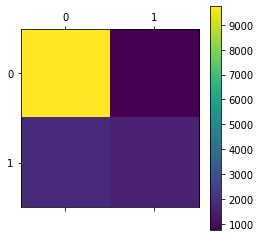

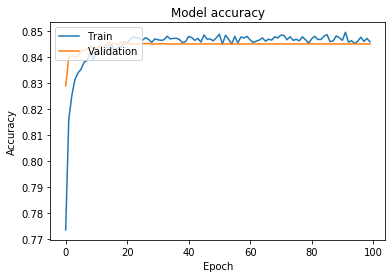

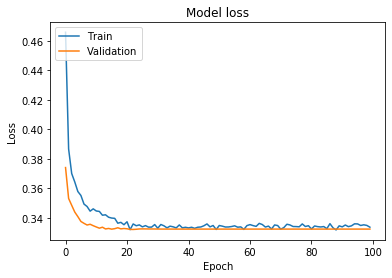

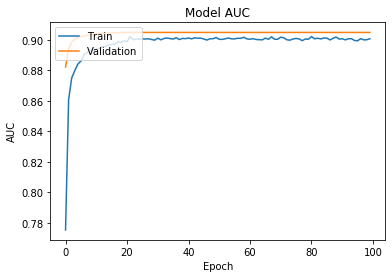

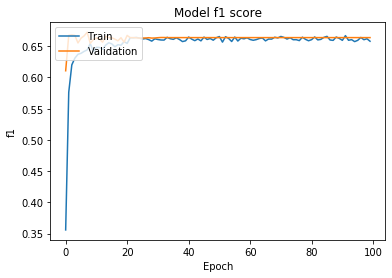

In [5]:
import matplotlib.pyplot as plt
# print(X_trainTrans.shape)


from keras.layers import Input, Dense, Dropout
# For a single-input model with 1 class (binary classification):
# A layer instance is callable on a tensor, and returns a tensor
inputs = Input(shape=(X_trainTrans.shape[1],)) # This returns a tensor
input_layer = Dense(64, activation='relu')(inputs)
drop_1 = Dropout(0.5)(input_layer)
hidden_layer = Dense(64, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(drop_2) #softmax, tanh


# Create the model with Input layer and the Dense/Droput layers
from keras.models import Model
model = Model(inputs=inputs, outputs=output_layer)


# metrics to keep track of over every epoch
from keras import metrics
METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.BinaryAccuracy(name='accuracy',threshold=0.5),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
]
# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',#rmsprop,sgd
              metrics=METRICS)


# Recall we have an imbalanced class, lets try and fix that
# 'This can be useful to tell the model to "pay more attention" to samples from an under-represented class.'
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Train the model, iterating on the data in batches of 'n' samples
num_epochs = 100
size_of_batch = 200
validation_data = None
from keras.callbacks import ReduceLROnPlateau # Reduce the learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, 
                  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history = model.fit(x=X_trainTrans, y=y_train, epochs=num_epochs, batch_size=size_of_batch,
                    validation_data=validation_data, validation_split=.3,
                    shuffle=True, callbacks=[reduce_lr],class_weight=class_weights)


# Evaluate model over the test set
test_sample_weight = None
loss_and_metrics = model.evaluate(x=X_testTrans, y=y_test, batch_size=size_of_batch, sample_weight=None)
lossMetricsLegible = [[metricName,metricValue] for metricName, metricValue in zip(history.history.keys(), loss_and_metrics)]

print('\n\nModel performance metrics on the test:')
for ind in range(len(lossMetricsLegible)):
    print('\t',lossMetricsLegible[ind][0][4:],':',lossMetricsLegible[ind][1])
print('\n\n')
tp = loss_and_metrics[1]
fp = loss_and_metrics[2]
tn = loss_and_metrics[3]
fn = loss_and_metrics[4]
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
CM = np.array([[tn,fp],[fn,tp]])
print(CM)
im = plt.matshow(CM,label=['<=50K','>50K'])
plt.colorbar(im)
plt.show()

from keras.utils import plot_model
# plot_model(model, to_file='savedModel/MLPmodel.png')


# print(history.history.keys()) #prints keys
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('kerasPlots/modelAccuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('kerasPlots/modelLoss.png')
plt.show()

# Plot training & validation AUC values
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('kerasPlots/modelAUC.png')
plt.show()

f1 = 2*(np.array(history.history['precision'])*np.array(history.history['recall'])) / \
    (np.array(history.history['precision']) + np.array(history.history['recall']))
val_f1 = 2*(np.array(history.history['val_precision'])*np.array(history.history['val_recall'])) / \
    (np.array(history.history['val_precision']) + np.array(history.history['val_recall']))    
# Plot training & validation f1 values
plt.plot(f1)
plt.plot(val_f1)
plt.title('Model f1 score')
plt.ylabel('f1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('kerasPlots/modelf1.png')
plt.show()
